In [ ]:
# Time series libraries

In [ ]:
# References
[sktime - Time Series library tutorial](https://www.sktime.net/en/latest/examples/01_forecasting.html)

In [47]:
import os
from datetime import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline
sns.set()

pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [48]:
# settings
import warnings
warnings.filterwarnings('ignore')
#print all rows of a df in ipython shell 
pd.set_option('display.max_rows', None)
#print all columns of a df in ipython shell 
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.precision", 6)

# optional
#pd.set_option('display.max_columns',100)
sns.set_style('darkgrid')

In [ ]:
## TOC:
* [sktime](#sktime-bullet)
* [Z-score](#zscore-bullet)
* [Difference between anomaly and change point](#diff-bullet)
* [Types of anomalies](#types-bullet)
* [Algoritms for anomaly detection](#algs-bullet)
* [Isolation Forest](#if-bullet)
* [Local Outlier Factor (LOF)](#lof-bullet)   

In [ ]:
## sktime <a class="anchor" id="sktime-bullet"></a>

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

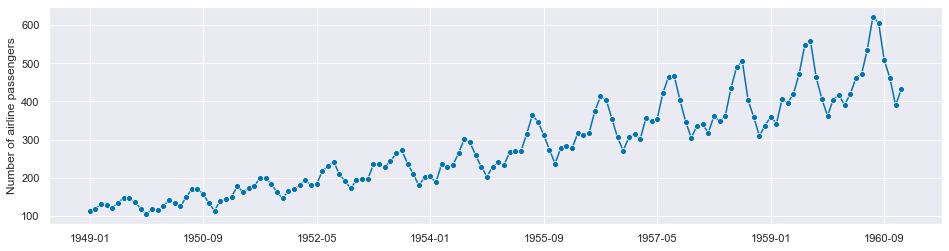

In [3]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
y = load_airline()

# plotting for visualization
plot_series(y)

In [4]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

0.13189432350948402


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

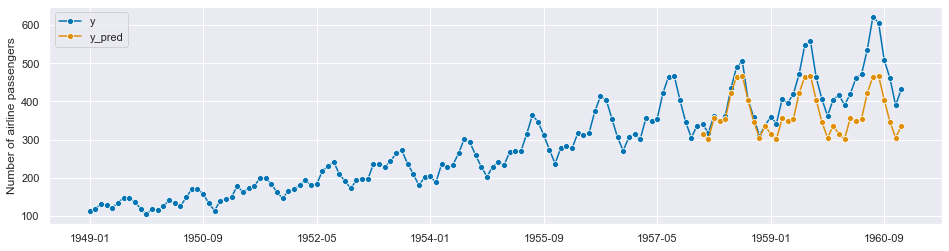

In [4]:
# sktime Forecasting example

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.ardl import ARDL
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.croston import Croston

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster = NaiveForecaster(sp=12)  # monthly seasonal periodicity
#forecaster = Croston(sp=12)  # monthly seasonal periodicity

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
print(mean_absolute_percentage_error(y_test, y_pred))

# plot the results
plot_series(y, y_pred, labels=["y", "y_pred"])


In [ ]:
# use case 1 - batch fitting and forecasting
# The simplest use case workflow is batch fitting and forecasting, i.e., fitting a forecasting model to one batch of past data, then asking for forecasts at 
# time point in the future.

In [4]:
from sktime.registry import all_estimators
    
all_estimators( "forecaster", as_dataframe=True, filter_tags={"requires-fh-in-fit": True}).name.tolist()
all_estimators( "forecaster", as_dataframe=True, filter_tags={"requires-fh-in-fit": True}).estimator.tolist()

#1. get libraries
from sktime.forecasting.theta import ThetaForecaster


In [1]:
print(5)

5


In [95]:
mylist = all_estimators( "forecaster", as_dataframe=True, suppress_import_stdout = False,
                              filter_tags={"requires-fh-in-fit": False}).estimator.tolist()


NameError: name 'AutoEnsembleForecaster' is not defined

In [96]:
from sktime.forecasting.ardl import ARDL
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.compose._ensemble import AutoEnsembleForecaster
from sktime.forecasting.bats import BATS
from sktime.forecasting.compose._bagging import BaggingForecaster
from sktime.forecasting.compose._column_ensemble import ColumnEnsembleForecaster
from sktime.forecasting.conformal import ConformalIntervals
from sktime.forecasting.croston import Croston
from sktime.forecasting.stream._update import DontUpdate
from sktime.forecasting.dynamic_factor import DynamicFactor
from sktime.forecasting.compose._ensemble import EnsembleForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.compose._grouped import ForecastByLevel
from sktime.forecasting.dummy import ForecastKnownValues
from sktime.forecasting.model_selection._tune import ForecastingGridSearchCV
from sktime.forecasting.compose._pipeline import ForecastingPipeline
from sktime.forecasting.model_selection._tune import ForecastingRandomizedSearchCV
from sktime.forecasting.adapters._hcrystalball import HCrystalBallAdapter
from sktime.forecasting.compose._hierarchy_ensemble import HierarchyEnsembleForecaster
from sktime.forecasting.compose._multiplexer import MultiplexForecaster
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.naive import NaiveVariance
from sktime.forecasting.online_learning._online_ensemble import OnlineEnsembleForecaster
from sktime.forecasting.compose._pipeline import Permute
from sktime.param_est.plugin import PluginParamsForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.reconcile import ReconcilerForecaster
from sktime.forecasting.compose._reduce import RecursiveTabularRegressionForecaster
from sktime.forecasting.compose._reduce import RecursiveTimeSeriesRegressionForecaster
from sktime.forecasting.sarimax import SARIMAX
from sktime.forecasting.trend import STLForecaster
from sktime.forecasting.statsforecast import StatsForecastAutoARIMA
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.theta import ThetaForecaster
from sktime.forecasting.theta import ThetaModularForecaster
from sktime.forecasting.compose._pipeline import TransformedTargetForecaster
from sktime.forecasting.trend import TrendForecaster
from sktime.forecasting.structural import UnobservedComponents
from sktime.forecasting.stream._update import UpdateEvery
from sktime.forecasting.stream._update import UpdateRefitsEvery
from sktime.forecasting.var import VAR
from sktime.forecasting.varmax import VARMAX
from sktime.forecasting.vecm import VECM

ARIMA()
0.31458867986086375
AutoARIMA()
0.11654166563445129
AutoETS()
0.1988734846796334
AutoEnsembleForecaster()


TypeError: AutoEnsembleForecaster.__init__() missing 1 required positional argument: 'forecasters'

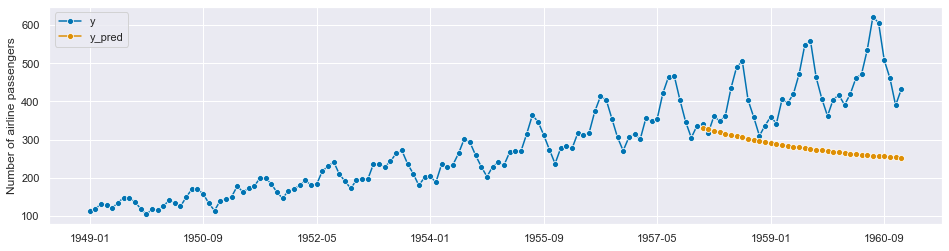

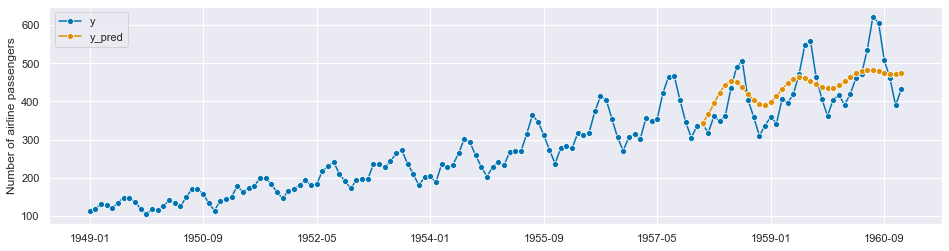

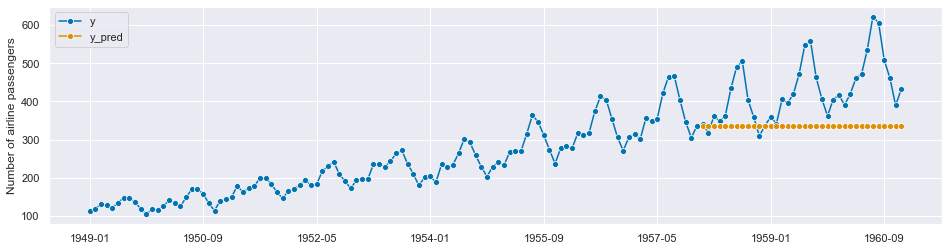

In [97]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)

for forecaster in mylist1:
   
    v_forecaster = forecaster.__name__+'()'
    print(v_forecaster)
    forecaster = eval(v_forecaster)
    forecaster.fit(y_train)
    y_pred = forecaster.predict(fh)
    print(mean_absolute_percentage_error(y_test, y_pred))

    # plot the results
    plot_series(y, y_pred, labels=["y", "y_pred"])
    
# TO DO - transform the dictionary to function parameters using a dictionary comprehension
model = eval('ARIMA()')
default_params = model.get_params() # get_test_params()
default_params

HI, I AM CREATED BY A FUNCTION PASSED AS AN ARGUMENT.
hi, i am created by a function passed as an argument.


[1, 2, 3, 4]
[4, 3, 2, 1]


In [79]:
model = eval('ARIMA()')
default_params = model.get_params()
default_params

{'concentrate_scale': False,
 'enforce_invertibility': True,
 'enforce_stationarity': True,
 'hamilton_representation': False,
 'maxiter': 50,
 'measurement_error': False,
 'method': 'lbfgs',
 'mle_regression': True,
 'order': (1, 0, 0),
 'out_of_sample_size': 0,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal_order': (0, 0, 0, 0),
 'simple_differencing': False,
 'start_params': None,
 'suppress_warnings': False,
 'time_varying_regression': False,
 'trend': None,
 'with_intercept': True}

0.11654166563445129


(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

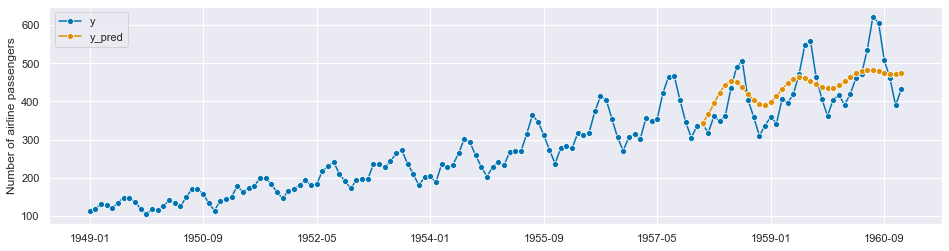

In [49]:
# under work, get the default parameters for ARDL

from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error


from sktime.forecasting.arima import ARIMA
from sktime.forecasting.ets import AutoETS

#ARDL.get_test_params(parameter_set='default')

#forecaster = ARDL(ARDL.get_test_params(parameter_set='default'))  # monthly seasonal periodicity

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)

#forecaster = AutoARIMA()
forecaster = 
#forecaster = ARIMA(ARIMA.get_test_params(parameter_set='default'))
#forecaster.get_params()

#forecaster.get_param_defaults()

#forecaster
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
print(mean_absolute_percentage_error(y_test, y_pred))

# plot the results
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
# required format
ARIMA(  
    order=(1, 1, 0),
    seasonal_order=(0, 1, 0, 12),
    suppress_warnings=True)
    
# obtained format 
ARIMA(order=[{'maxiter': 3},
             {'maxiter': 3, 'order': (1, 1, 0),
              'seasonal_order': (1, 0, 0, 2)}])

In [15]:
# WORKING 
# 1. creating the imports .estimator.tolist()
from sktime.registry import all_estimators

for forecaster in all_estimators( "forecaster", as_dataframe=True, suppress_import_stdout = False,
                              filter_tags={"requires-fh-in-fit": False}).estimator.tolist():
   
    print('from ' + forecaster.__module__ + ' import ' + forecaster.__name__)

  


from sktime.forecasting.ardl import ARDL
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.compose._ensemble import AutoEnsembleForecaster
from sktime.forecasting.bats import BATS
from sktime.forecasting.compose._bagging import BaggingForecaster
from sktime.forecasting.compose._column_ensemble import ColumnEnsembleForecaster
from sktime.forecasting.conformal import ConformalIntervals
from sktime.forecasting.croston import Croston
from sktime.forecasting.stream._update import DontUpdate
from sktime.forecasting.dynamic_factor import DynamicFactor
from sktime.forecasting.compose._ensemble import EnsembleForecaster
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.compose._grouped import ForecastByLevel
from sktime.forecasting.dummy import ForecastKnownValues
from sktime.forecasting.model_selection._tune import ForecastingGridSearchCV
from sktim

In [16]:
from inspect import signature
from sktime.registry import all_estimators

imports = []
for li in mylist:
    
    # extract import classes
    print(li)
    #myimports = str(estimator[1]).split('.')[0:-1]
    #myimport='.'.join(myimports)
type(li)

<class 'sktime.forecasting.ardl.ARDL'>
<class 'sktime.forecasting.arima.ARIMA'>
<class 'sktime.forecasting.arima.AutoARIMA'>
<class 'sktime.forecasting.ets.AutoETS'>
<class 'sktime.forecasting.compose._ensemble.AutoEnsembleForecaster'>
<class 'sktime.forecasting.bats.BATS'>
<class 'sktime.forecasting.compose._bagging.BaggingForecaster'>
<class 'sktime.forecasting.compose._column_ensemble.ColumnEnsembleForecaster'>
<class 'sktime.forecasting.conformal.ConformalIntervals'>
<class 'sktime.forecasting.croston.Croston'>
<class 'sktime.forecasting.stream._update.DontUpdate'>
<class 'sktime.forecasting.dynamic_factor.DynamicFactor'>
<class 'sktime.forecasting.compose._ensemble.EnsembleForecaster'>
<class 'sktime.forecasting.exp_smoothing.ExponentialSmoothing'>
<class 'sktime.forecasting.compose._grouped.ForecastByLevel'>
<class 'sktime.forecasting.dummy.ForecastKnownValues'>
<class 'sktime.forecasting.model_selection._tune.ForecastingGridSearchCV'>
<class 'sktime.forecasting.compose._pipeline

type

In [4]:
from inspect import signature
from sktime.registry import all_estimators

myestimators = all_estimators( "forecaster", as_dataframe=True, suppress_import_stdout = False,
                              filter_tags={"requires-fh-in-fit": False}).estimator.tolist()
# print(myestimators)

myimports ='sktime.forecasting.compose._reduce.DirRecTabularRegressionForecaster'.split('.')[0:-1]
myimport='.'.join(myimports)
print(myimport)

myfunction = 'sktime.forecasting.compose._reduce.DirRecTabularRegressionForecaster'.split('.')[-1]
print(myfunction)

from sktime.forecasting.compose._reduce import DirRecTabularRegressionForecaster

sig = signature(DirRecTabularRegressionForecaster)
print(sig)

mydefaultparams = DirRecTabularRegressionForecaster.get_test_params(parameter_set='default')
print(mydefaultparams)

sktime.forecasting.compose._reduce
DirRecTabularRegressionForecaster
(estimator, window_length=10, transformers=None, pooling='local')
{'estimator': LinearRegression(), 'window_length': 3}


In [8]:
mfff = all_estimators("forecaster", filter_tags={"handles-missing-data": True})
display(mfff)

[('ARIMA', sktime.forecasting.arima.ARIMA),
 ('AutoARIMA', sktime.forecasting.arima.AutoARIMA),
 ('AutoETS', sktime.forecasting.ets.AutoETS),
 ('DirRecTabularRegressionForecaster',
  sktime.forecasting.compose._reduce.DirRecTabularRegressionForecaster),
 ('DirRecTimeSeriesRegressionForecaster',
  sktime.forecasting.compose._reduce.DirRecTimeSeriesRegressionForecaster),
 ('DirectTabularRegressionForecaster',
  sktime.forecasting.compose._reduce.DirectTabularRegressionForecaster),
 ('DirectTimeSeriesRegressionForecaster',
  sktime.forecasting.compose._reduce.DirectTimeSeriesRegressionForecaster),
 ('DynamicFactor', sktime.forecasting.dynamic_factor.DynamicFactor),
 ('ForecastByLevel', sktime.forecasting.compose._grouped.ForecastByLevel),
 ('ForecastingPipeline',
  sktime.forecasting.compose._pipeline.ForecastingPipeline),
 ('MultioutputTabularRegressionForecaster',
  sktime.forecasting.compose._reduce.MultioutputTabularRegressionForecaster),
 ('MultioutputTimeSeriesRegressionForecaster',

In [38]:
DirRecTabularRegressionForecaster.get_test_params(parameter_set='default')

{'estimator': LinearRegression(), 'window_length': 3}

In [35]:
sig = signature(DirRecTabularRegressionForecaster)
sig
str(sig)
params = sig.parameters 
params
#print(params['kwarg1'])

mappingproxy({'estimator': <Parameter "estimator">,
              'window_length': <Parameter "window_length=10">,
              'transformers': <Parameter "transformers=None">,
              'pooling': <Parameter "pooling='local'">})

In [36]:
help(DirRecTabularRegressionForecaster)

Help on class DirRecTabularRegressionForecaster in module sktime.forecasting.compose._reduce:

class DirRecTabularRegressionForecaster(_DirRecReducer)
 |  DirRecTabularRegressionForecaster(estimator, window_length=10, transformers=None, pooling='local')
 |  
 |  Dir-rec reduction from forecasting to tabular regression.
 |  
 |  For the hybrid dir-rec strategy, a separate forecaster is fitted
 |  for each step ahead of the forecasting horizon and then
 |  the previous forecasting horizon is added as an input
 |  for training the next forecaster, following the recusrive
 |  strategy.
 |  
 |  Parameters
 |  ----------
 |  estimator : sklearn estimator object
 |      Tabular regressor.
 |  window_length : int, optional (default=10)
 |      The length of the sliding window used to transform the series into
 |      a tabular matrix
 |  
 |  Method resolution order:
 |      DirRecTabularRegressionForecaster
 |      _DirRecReducer
 |      _Reducer
 |      sktime.forecasting.base._sktime._Base

In [30]:
# get tags for a model
from sktime.forecasting.arima import ARIMA
ARIMA().get_tags()


{'scitype:y': 'univariate',
 'ignores-exogeneous-X': False,
 'capability:insample': True,
 'capability:pred_int': True,
 'capability:pred_int:insample': True,
 'handles-missing-data': True,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'pmdarima'}

In [22]:
# Available forecasters

from sktime.registry import all_estimators

all_estimators("forecaster", as_dataframe=True)

#for forecaster in all_estimators(filter_tags={"scitype:y": ["multivariate", "both"]}):
#    print(forecaster[0])

forecaster_list = all_estimators("forecaster", as_dataframe=False)
forecaster_list


# this lists all forecasters that can deal with multivariate data
all_estimators("forecaster", as_dataframe=True, filter_tags={"scitype:y": ["multivariate", "both"]})

all_estimators( "forecaster", as_dataframe=True, filter_tags={"scitype:y": ["both"]})

all_estimators( "forecaster", as_dataframe=True, filter_tags={"fit_is_empty": False})

all_estimators( "forecaster", as_dataframe=True, filter_tags={"handles-missing-data": False})

all_estimators( "forecaster", as_dataframe=True, filter_tags={"requires-fh-in-fit": True})

forecaster_list

[('ARDL', sktime.forecasting.ardl.ARDL),
 ('ARIMA', sktime.forecasting.arima.ARIMA),
 ('AutoARIMA', sktime.forecasting.arima.AutoARIMA),
 ('AutoETS', sktime.forecasting.ets.AutoETS),
 ('AutoEnsembleForecaster',
  sktime.forecasting.compose._ensemble.AutoEnsembleForecaster),
 ('BATS', sktime.forecasting.bats.BATS),
 ('BaggingForecaster', sktime.forecasting.compose._bagging.BaggingForecaster),
 ('ColumnEnsembleForecaster',
  sktime.forecasting.compose._column_ensemble.ColumnEnsembleForecaster),
 ('ConformalIntervals', sktime.forecasting.conformal.ConformalIntervals),
 ('Croston', sktime.forecasting.croston.Croston),
 ('DirRecTabularRegressionForecaster',
  sktime.forecasting.compose._reduce.DirRecTabularRegressionForecaster),
 ('DirRecTimeSeriesRegressionForecaster',
  sktime.forecasting.compose._reduce.DirRecTimeSeriesRegressionForecaster),
 ('DirectTabularRegressionForecaster',
  sktime.forecasting.compose._reduce.DirectTabularRegressionForecaster),
 ('DirectTimeSeriesRegressionForecas

In [ ]:
# Miscellous

In [ ]:
help('valami'.split)

In [ ]:
# example
from inspect import signature

def someMethod(self, arg1, kwarg1=None):
    pass

sig = signature(someMethod)
sig

In [ ]:
# Python program to illustrate functions 
# can be passed as arguments to other functions 
def shout(text): 
    return text.upper() 
  
def whisper(text): 
    return text.lower() 
  
def greet(func): 
    # storing the function in a variable 
    greeting = func("Hi, I am created by a function passed as an argument.") 
    print(greeting)
  
greet(shout) 
greet(whisper) 

In [ ]:
func_name = 'reverse'

l = [1, 2, 3, 4]
print(l)


l.__getattribute__(func_name)()
print(l)
